In [2]:
### imports ###
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from IPython.display import Image
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import scipy as sc

1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

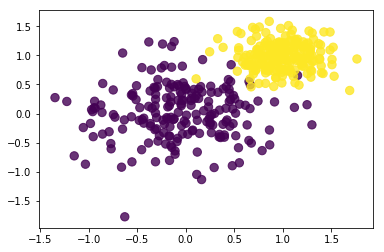

In [3]:
Image('two_categories_scatter_plot.png')

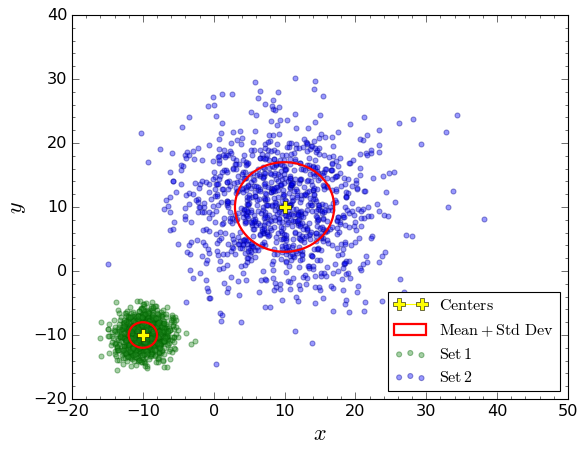

In [4]:
plt.style.use('classic')
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')

# defining the function to return two 2D distributions for a given nb of samples, means and sigmas
def random2D_2distr(nb_of_elements, mean1, sigma1, mean2, sigma2):
    normal1 = np.random.normal(loc = mean1, scale = sigma1, size = (nb_of_elements, nb_of_elements))
    normal2 = np.random.normal(loc = mean2, scale = sigma2, size = (nb_of_elements, nb_of_elements))
    return normal1, normal2


n = 1000
mean1, sigma1 = -10, 2
mean2, sigma2 = 10, 7

# calling the normal distributions
normal1, normal2 = random2D_2distr(n, mean1, sigma1, mean2, sigma2)

ax.scatter(normal1[0, :], normal1[1, :], marker = 'o', color = 'forestgreen', edgecolor = "darkgreen", alpha = 0.4, label = "${\\rm Set\, 1}$")
ax.scatter(normal2[0, :], normal2[1, :], marker = 'o', color = 'blue', edgecolor = "darkblue", alpha = 0.4, label = "${\\rm Set\, 2}$")


ax.plot(mean1, mean1, marker = "P", color = "yellow", markersize = 10, label = "${\\rm Centers}$")
ax.plot(mean2, mean2, marker = "P", color = "yellow", markersize = 10)
CI_normal1 = plt.Circle((mean1, mean1), sigma1, color='red', fill = False, label = "${\\rm Mean} + {\\rm Std\ Dev}$", linewidth = 2.)
CI_normal2 = plt.Circle((mean2, mean2), sigma2, color='red', fill = False, linewidth = 2.)

# plotting the region inside 1 sigma
ax.add_patch(CI_normal1)
ax.add_patch(CI_normal2)

# formatting
ax.set_xlabel("$x$", size = 20); ax.set_ylabel("$y$", size = 20)
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)
ax.legend(loc = "best")

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

Sample cleaned: 
       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


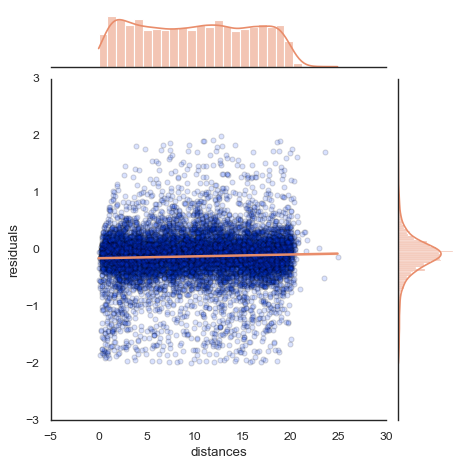

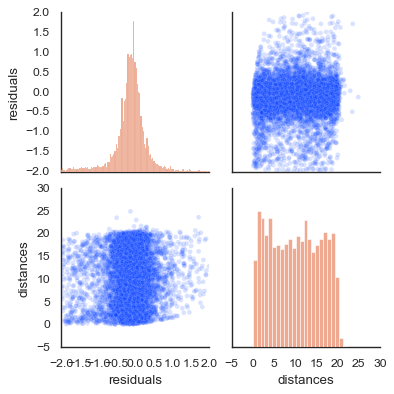

In [6]:
sns.set_theme(context = "notebook", style = "white", palette = "bright")
sns.set_palette("flare")

# inspection
fileName = "data/residuals_261.pkl"

infile = open(fileName, 'rb')
data = pickle.load(infile)
infile.close()

pickle_dict = dict(data.item()) # passing the pickle to a dictionary
pickle_dict["residuals"]

# now we convert to pandas dataframe
df = pd.DataFrame(pickle_dict)

# keep the values where |residuals| < 2
df_cleaned = df.loc[abs(df["residuals"]) < 2]
print("Sample cleaned: ")
print(df_cleaned)

# plotting
g = sns.jointplot(data = df_cleaned, x = "distances", y = "residuals", kind = "reg", scatter = False)
g.ax_joint.scatter(data = df_cleaned, x = "distances", y = "residuals", marker = "o", alpha = 0.15, edgecolors = "black")

sns.pairplot(df_cleaned, plot_kws={'alpha':0.15, 'size':1.})


Although the relation between the variables seems to be linear, the correlation seems to be nearly zero (i.e. residuals are nearly a constant for any value of distances). We will se a proper fit right below.

The array of centers: 
[ 0.65789474  1.97368421  3.28947368  4.60526316  5.92105263  7.23684211
  8.55263158  9.86842105 11.18421053 12.5        13.81578947 15.13157895
 16.44736842 17.76315789 19.07894737 20.39473684 21.71052632 23.02631579
 24.34210526]
Mean values of the residuals: 
bins
1    -0.199599
2    -0.161628
3    -0.162387
4    -0.134006
5    -0.127878
6    -0.080350
7    -0.096897
8    -0.075548
9    -0.071430
10   -0.103922
11   -0.130462
12   -0.131386
13   -0.141490
14   -0.146918
15   -0.084684
16   -0.008649
17    0.201333
18    0.412857
19   -0.128571
Name: residuals, dtype: float64
Std Dev of the residuals: 
bins
1     0.464160
2     0.420175
3     0.422989
4     0.378317
5     0.446543
6     0.439378
7     0.428787
8     0.428568
9     0.449712
10    0.506670
11    0.455000
12    0.467246
13    0.436043
14    0.415771
15    0.388925
16    0.447871
17    0.144079
18    1.154028
19         NaN
Name: residuals, dtype: float64


/var/folders/nv/28ksfhj10wz9h413w7pr82sc0000gn/T/ipykernel_51260/1685299974.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["bins"] = np.digitize(df_cleaned["distances"], bins = binsx)


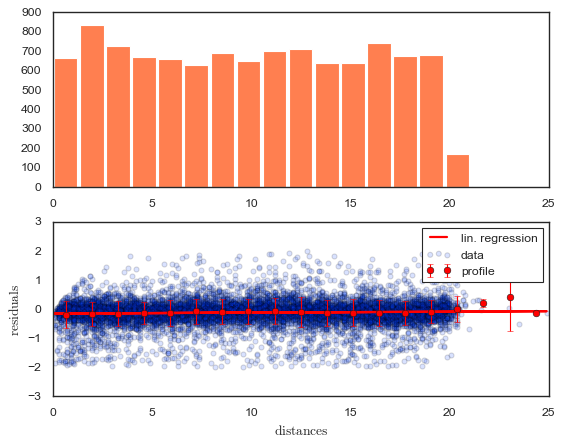

In [7]:
# creating the histogram of distances manually
binsx = np.linspace(0, 25, 20)
#df_cleaned["distances"].hist(bins = binsx, align = "mid", color = "coral", rwidth = 0.9)

# obtaining the centers of histograms
x = (binsx[1:]+binsx[:-1])/2
print("The array of centers: ")
print(x)

# obtaining the mean values of the residuals 
df_cleaned["bins"] = np.digitize(df_cleaned["distances"], bins = binsx)
y = df_cleaned.groupby("bins")["residuals"].mean()
print("Mean values of the residuals: ")
print(y)
err_y = df_cleaned.groupby("bins")["residuals"].std()
print("Std Dev of the residuals: ")
print(err_y)

fig, ax = plt.subplots(2,1); fig.patch.set_facecolor("xkcd:white")

b, a, rvalue, pvalue, std_err = sc.stats.linregress(df_cleaned.distances, df_cleaned.residuals)

ax[1].plot(df_cleaned.distances, a + b*df_cleaned.distances, linewidth = 2, color = 'red', label = "lin. regression")
ax[1].errorbar(x, y, yerr = err_y, marker = 'o', lw = 0, capsize=2.5, elinewidth=1., color='red', label = "profile")



ax[0].hist(df_cleaned["distances"], bins = binsx, align = "mid", color = "coral", rwidth = 0.9)
ax[1].scatter(data = df_cleaned, x = "distances", y = "residuals", marker = "o", alpha = 0.15, edgecolors = "black", label = "data")
ax[1].set_xlim(0, 25); ax[1].set_xlabel("${\\rm distances}$")
ax[1].set_ylabel("${\\rm residuals}$")
ax[1].legend(loc = "best")

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


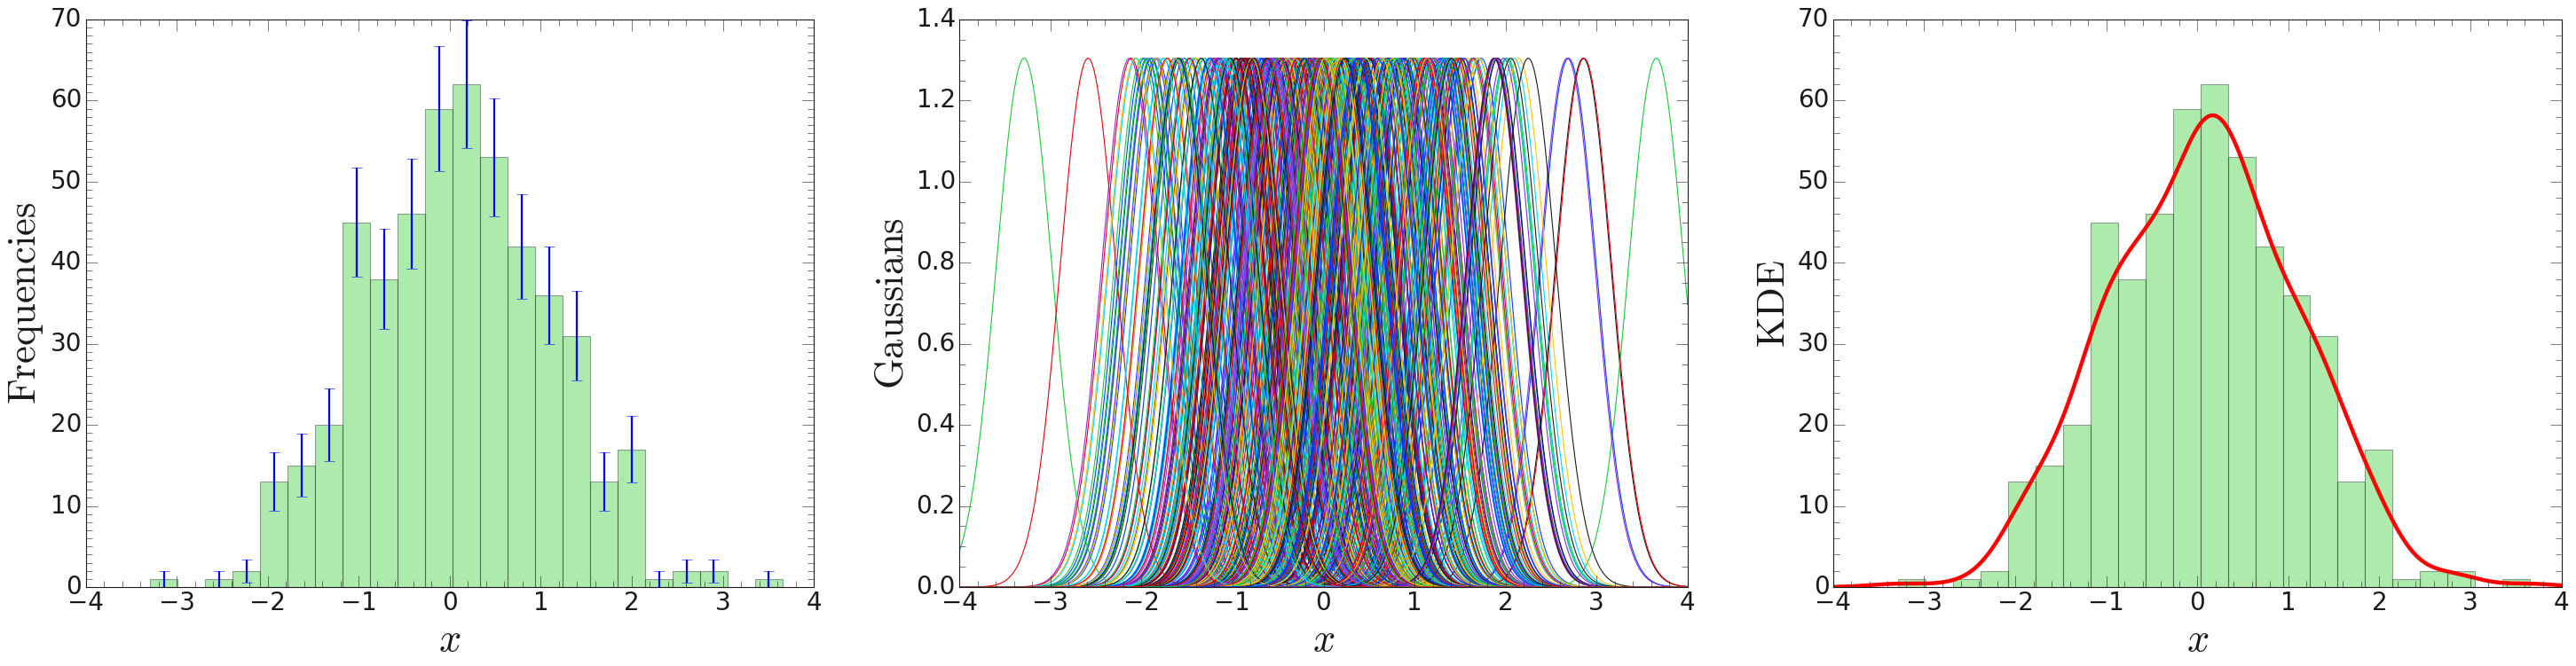

In [16]:
# style
plt.style.use("classic")
fig, ax = plt.subplots(1,3, figsize = (45, 10))
fig.patch.set_facecolor("xkcd:white")

# and format
for i in range(len(ax)):
    ax[i].tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 12)
    ax[i].minorticks_on()
    ax[i].tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 6)
    ax[i].tick_params(axis = 'both', labelsize = 25)
    ax[i].set_xlabel("$x$", fontsize = 40)
ax[0].yaxis.set_major_locator(MultipleLocator(10))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(10))

ax[0].set_ylabel("${\\rm Frequencies}$", fontsize = 40)
ax[1].set_ylabel("${\\rm Gaussians}$", fontsize = 40)
ax[2].set_ylabel("${\\rm KDE}$", fontsize = 40)


# initializing variables
mean = 0.
stdDev = 1.
n = 500

# generate n random numbers using a Gaussian pdf
x = np.random.normal(loc = mean, scale = stdDev, size=(n,)) 

# implementing an appropiate number of bins with √n rule
nbins = int(np.ceil(np.sqrt(n)))

# plotting
h, xbins, _ = ax[0].hist(x, bins = nbins, alpha = 0.4, color = "limegreen")

# getting the centers of the histograms
centers = (xbins[1:]+xbins[:-1])/2

# calculating the absolute poisson uncertainty associated with each bin
err_y = np.zeros(len(centers))
for i in range(len(centers)):
    err_y[i] = np.sqrt(h[i])

# plotting errors
ax[0].errorbar(centers, h, yerr = err_y, capsize=5., elinewidth=2., lw=0, color='blue', )

# creating an aux vector to help plot the ind. gaussians
xaux = np.linspace(mean-4*stdDev, mean+4*stdDev, 1000)

# creating a gaussian for each event
gaussianx_list = []
stdDev_x = 1.06 * stdDev * n**(-1./5.)
for i in range(len(x)):
    gaussianx_list.append(sc.stats.norm.pdf(xaux, loc = x[i], scale = stdDev_x))
    ax[1].plot(xaux, gaussianx_list[i])

# summing all gaussian values for each point
sum_gaussian = np.sum(gaussianx_list, axis = 0)

# calculating the kde
kde = sum_gaussian * np.sum(np.diff(xbins)*h) / sc.integrate.trapz(sum_gaussian, xaux) # the kde at one point is the integral of every gaussian, weighted by the tot number of entries and the integral of all gaussians

# plot
ax[2].hist(x, bins = nbins, alpha = 0.4, color = "limegreen")
ax[2].plot(xaux, kde, color = 'red', linewidth = 4.)